<a href="https://colab.research.google.com/github/mingyu1021/AI-class/blob/main/4week/winequality_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/AI-class/winequality-white.csv', delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# 2. 독립 변수 (X)와 종속 변수 (y) 분리
X = df.drop('quality', axis=1)
y = df['quality']

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [ ]:
y

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


In [ ]:
# 3. 데이터 분할
# 훈련 데이터 80%, 테스트 데이터 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4665,7.3,0.17,0.36,8.20,0.028,44.0,111.0,0.99272,3.14,0.41,12.4
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5
3399,5.6,0.32,0.33,7.40,0.037,25.0,95.0,0.99268,3.25,0.49,11.1
843,6.9,0.19,0.35,1.70,0.036,33.0,101.0,0.99315,3.21,0.54,10.8
2580,7.7,0.30,0.26,18.95,0.053,36.0,174.0,0.99976,3.20,0.50,10.4
...,...,...,...,...,...,...,...,...,...,...,...
4426,6.2,0.21,0.52,6.50,0.047,28.0,123.0,0.99418,3.22,0.49,9.9
466,7.0,0.14,0.32,9.00,0.039,54.0,141.0,0.99560,3.22,0.43,9.4
3092,7.6,0.27,0.52,3.20,0.043,28.0,152.0,0.99129,3.02,0.53,11.4
3772,6.3,0.24,0.29,13.70,0.035,53.0,134.0,0.99567,3.17,0.38,10.6


In [ ]:
y_train

,quality
4665,6
1943,5
3399,6
843,7
2580,5
...,...
4426,6
466,6
3092,6
3772,6


In [ ]:
# 4. 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 0.51511931, -1.07623315,  0.22773076, ..., -0.32826101,
        -0.70244474,  1.54037099],
       [-0.66918809, -0.28877673,  0.89583195, ..., -0.06188569,
         0.26607415, -0.82171197],
       [-1.49820327,  0.40024764, -0.02280718, ...,  0.40427112,
         0.00193263,  0.48150622],
       ...,
       [ 0.87041153, -0.09191263,  1.56393313, ..., -1.12738698,
         0.35412132,  0.72585963],
       [-0.66918809, -0.38720878, -0.35685777, ..., -0.12847952,
        -0.96658625,  0.07425053],
       [ 1.46256523, -0.09191263,  0.14421812, ...,  0.20448963,
         1.23459303, -0.08865174]])

In [ ]:
# 5. 모델 학습 (KNN)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# 6. 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")


모델 정확도: 0.5429


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


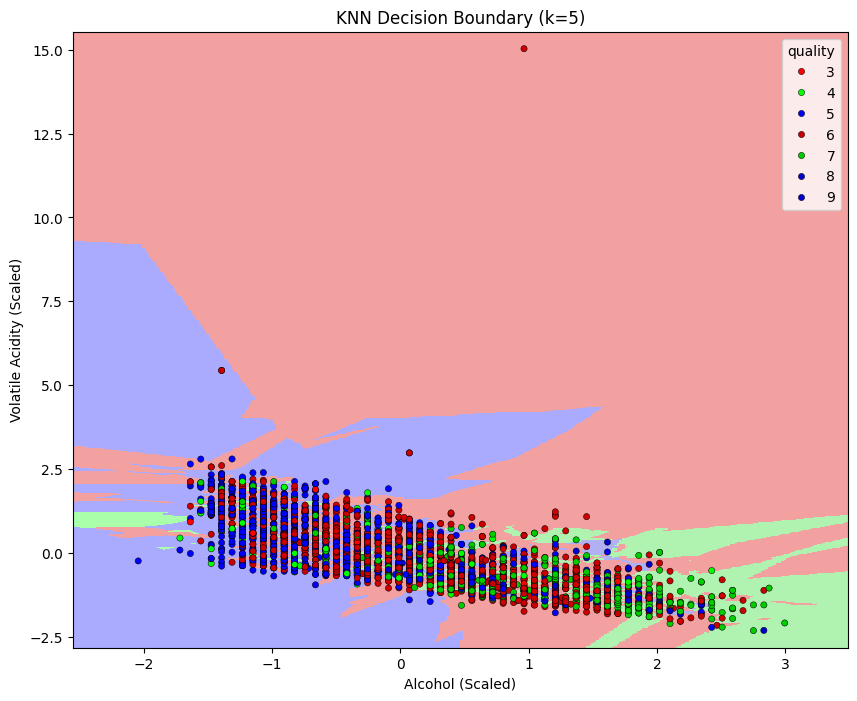

In [7]:
# 시각화를 위한 데이터 선택
X = df[['alcohol', 'density']]
y = df['quality']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# KNN 모델 학습
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# 결정 경계 시각화 -> 그래프 축 범위 설정
x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5

# 그래프 영역 전체 meshgrid를 생성
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 메쉬그리드의 모든 점에 대해 모델의 예측값을 계산
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 클래스별 색상을 지정하기 위한 컬러맵 생성
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#F2A0A0', '#B0F2B0', '#B0B0F2'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#CC0000', '#00CC00', '#0000CC'])

plt.figure(figsize=(10, 8))

# 예측된 영역 색상 채우기
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# 훈련 데이터 포인트를 시각화
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=cmap_bold, edgecolor='k', s=20)

plt.title('KNN Decision Boundary (k=5)')
plt.xlabel('Alcohol (Scaled)')
plt.ylabel('Volatile Acidity (Scaled)')
plt.show()